In [ ]:
import 'dart:async';
import 'dart:io';

void main() {
  PomodoroTimer pomodoroTimer = PomodoroTimer(); // PomodoroTimer 객체 생성
  pomodoroTimer.initializeDurations(); // 사용자로부터 설정값을 입력받아 초기화
  pomodoroTimer.start(); // 타이머 시작
}

class PomodoroTimer {
  // 사용자 설정값
  late int workDuration; // 작업 시간 (초 단위)
  late int shortBreakDuration; // 짧은 휴식 시간 (초 단위)
  late int longBreakDuration; // 긴 휴식 시간 (초 단위)
  late int longBreakInterval; // 긴 휴식 간격 (몇 회차마다 긴 휴식 실행)

  // 실행 설정
  final int maxCycles = 4; // 최대 실행 사이클
  int cycleCount = 0; // 현재 사이클 수
  bool isTestMode = false; // 테스트 모드 여부
  final int speedMultiplier = 5; // 실행 속도 배수 (1초를 줄이기 위해 사용)

  /// 사용자 입력을 통해 작업 시간, 휴식 시간, 긴 휴식 간격을 초기화
  void initializeDurations() {
    print("테스트 모드로 실행하시겠습니까? (y/n):");
    String? testModeInput = stdin.readLineSync();
    isTestMode = testModeInput != null && testModeInput.toLowerCase() == 'y';

    print("작업 시간을 분 단위로 입력하세요 (예: 25):");
    workDuration = int.parse(stdin.readLineSync()!) * (isTestMode ? 1 : 60);

    print("짧은 휴식 시간을 분 단위로 입력하세요 (예: 5):");
    shortBreakDuration = int.parse(stdin.readLineSync()!) * (isTestMode ? 1 : 60);

    print("긴 휴식 시간을 분 단위로 입력하세요 (예: 15):");
    longBreakDuration = int.parse(stdin.readLineSync()!) * (isTestMode ? 1 : 60);

    print("긴 휴식 간격을 입력하세요 (예: 4):");
    longBreakInterval = int.parse(stdin.readLineSync()!);
  }

  /// Pomodoro 타이머를 시작
  void start() {
    print("Pomodoro 타이머를 시작합니다.");
    _startWorkSession(); // 작업 세션 시작
  }

  /// 작업 세션 시작
  void _startWorkSession() {
    if (cycleCount >= maxCycles) {
      // 최대 실행 사이클에 도달하면 종료
      print("Pomodoro 타이머가 종료되었습니다. 수고하셨습니다!");
      return;
    }

    int remainingTime = workDuration; // 작업 시간 초기화
    print("작업 시간을 시작합니다: ${_formatTime(remainingTime)}");

    _startTimer(remainingTime, () {
      print("작업 시간이 종료되었습니다. 휴식 시간을 시작합니다.");
      _startBreakSession(); // 휴식 세션 시작
    }, "[${cycleCount + 1}회차][작업]");
  }

  /// 휴식 세션 시작
  void _startBreakSession() {
    cycleCount++; // 현재 사이클 증가
    if (cycleCount > maxCycles) {
      // 최대 실행 사이클에 도달하면 종료
      print("Pomodoro 타이머가 종료되었습니다. 수고하셨습니다!");
      return;
    }

    // 긴 휴식과 짧은 휴식을 결정
    int remainingTime = (cycleCount % longBreakInterval == 0) ? longBreakDuration : shortBreakDuration;
    String breakType = (cycleCount % longBreakInterval == 0) ? "긴 휴식" : "짧은 휴식";

    print("$breakType 시간을 시작합니다: ${_formatTime(remainingTime)}");

    _startTimer(remainingTime, () {
      print("$breakType 시간이 종료되었습니다. 다음 작업 시간을 시작합니다.");
      _startWorkSession(); // 다음 작업 세션 시작
    }, "[${cycleCount}회차][휴식]");
  }

  /// 공통 타이머 실행 함수
  void _startTimer(int duration, Function onComplete, String prefix) {
    Timer.periodic(Duration(milliseconds: 1000 ~/ speedMultiplier), (timer) {
      if (duration > 0) {
        duration--; // 남은 시간 감소
        print("$prefix ${_formatTime(duration)}");
      } else {
        timer.cancel(); // 타이머 종료
        onComplete(); // 완료 콜백 호출
      }
    });
  }

  /// 초를 "MM:SS" 형식으로 변환
  String _formatTime(int seconds) {
    int minutes = seconds ~/ 60;
    int remainingSeconds = seconds % 60;
    return "${minutes.toString().padLeft(2, '0')}:${remainingSeconds.toString().padLeft(2, '0')}";
  }
}


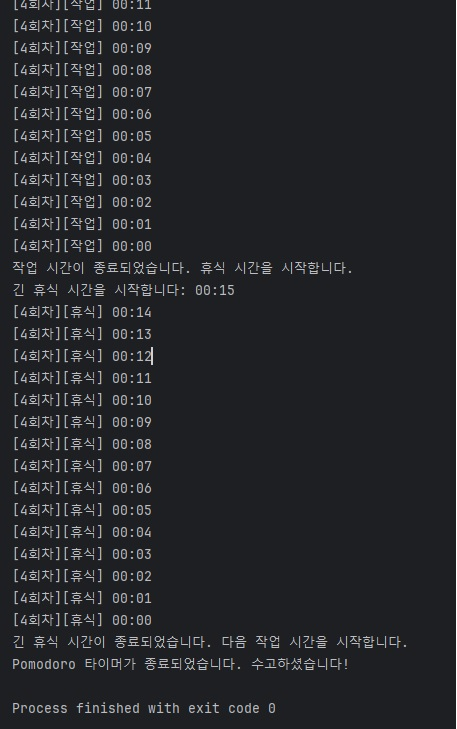
